<a href="https://colab.research.google.com/github/veranika-izrailyan/Machine_Learning/blob/main/ca_lab_ml_pipeline_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE: Introduction to Machine Learning Pipelines with scikit-learn
## Author: Andrea Giussani

The aim of this lab is to challenge you on building a supervised machine learning pipeline to predict the median values of owner-occupied housing in USD 1000, denoted as MEDV. We are going to famous Boston dataset, which contains a set of different features that are used to predict the MEDV target variable. Here, you will be guided with an hands-on exercise on data preprocessing, fitting and evaluation of a regression model. 

To get the most from this lab, it is recommended to have confidence and exposure to the following libraries: `pandas`, `matplotlib` and `scikit-learn`.

I strongly encourage you to have watched the following courses, available in our content library:
 - Building a Machine Learning pipeline with scikit-learn: part 1 <br>
 - Building a Machine Learning pipeline with scikit-learn: part 2 <br>

before starting this hands-on lab.

## 1. Data Ingestion

We import the Boston dataset using the pandas `pd.read_csv` method. We also inspect the first five rows by applying the `.head()` method.

In [ ]:
import pandas as pd
boston_df = pd.read_csv('data/boston.csv')

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The Boston data frame has 506 observations and 13 features. Among many, it is worth mentioning the `INDUS` and the `NOX` columns, which describe `proportion of non-retail business acres per town` and  `nitrogen oxides concentration (parts per 10 million)`, respectively. To get a better understanding of what's going on, let us at first separate the target variable MEDV from the set of independent variables.

In [ ]:
X = boston_df.drop(['MEDV'], axis=1)
y = boston_df['MEDV']

We plot the statistical distribution of each single feature, using the classical boxplot method. Remember: a Box Plot is the visual representation of five statistical summary statistics of a given feature. Those five statistical measures are: the minimum, the 25th, 50th, 75th percentile, and the maximum value.  Box plots therefore use robust summary statistics that can be quickly computed by hand, and have no tuning parameters. They are particularly useful for comparing distributions across groups. 

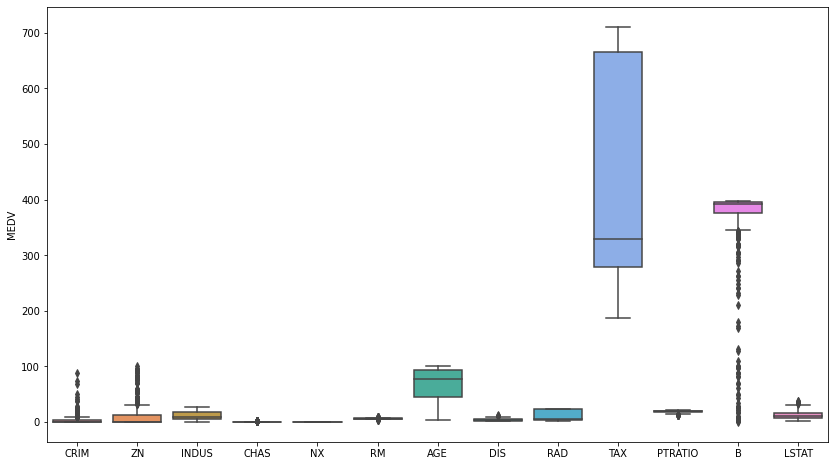

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(X))
ax.set_xlabel('')
ax.set_ylabel('MEDV')
plt.show()

Can you spot a potential problem here? Well there are many. One is that different features are expressed in different order of magnitude. What does in mean practically? It means that, for instance, `TAX` is expressed in hundreds, whereas `INDUS` is a binary variable. Also, some variables are skewed ... It makes sense to scale the data, meaning to normalize each single data point by subtracting the mean and diving by the feature standard deviation.

## 2. Scaling Data

To do so, we use the `StandardScaler` scikit-learn transformer. Remember: a transformer is characterized by two methods. A `fit`, which learn patterns in the data. And a `predict`, which uses those patterns to transform the original dataset. For the `StandardScaler`, the mean and the standard deviation are learnt during the fit phase, and then the new scaled dataset is obtained by transform ing the original one using those information.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

We store the new scaled data inside a `pandas.DataFrame` object.

## Instruction
You are asked to create a `pandas.DataFrame` called `scaled_df` that contains the `X_scaled` data. To do so, you can call the following snippet:
```python
scaled_df = pd.DataFrame(X_scaled, columns=list(X_train))
```

In [ ]:
# TO BE FILLED BY STUDENT
scaled_df = pd.DataFrame(X_scaled, columns=list(X_train))

In [ ]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
assert type(scaled_df) == pd.DataFrame
with open('results/vcf_ml_pipe_01.txt', 'w') as f:
    for item in [round(scaled_df.iloc[0,0], 2)]:
        f.write("%s\n" % item)

Let us plot the scaled features: as you can see, now we have remove the magnitude effect, but the skewness effect is still present in each single feature. That is not a big deal, but please note that there exists different methods that allow to further clean the data: one possibility is to fully force the data to be Gaussian: this method is typically used in time-series analysis (ARMA, ARIMA) so for this use case we can proceed with the plain-vanilla scaled data.  

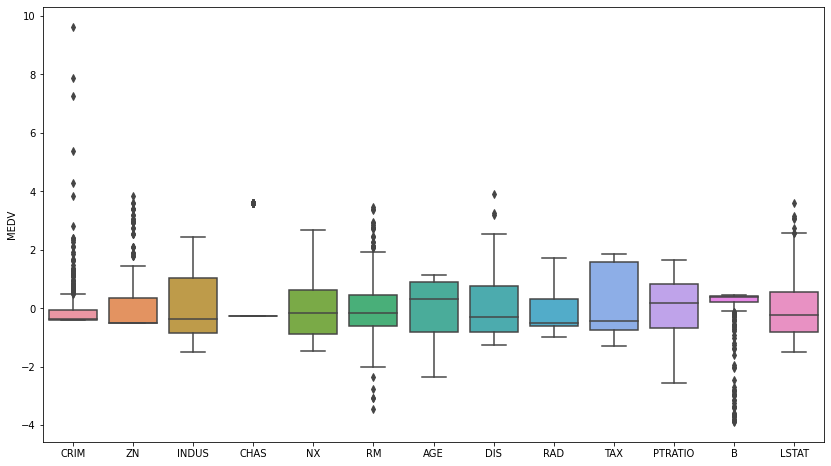

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(scaled_df))
ax.set_xlabel('')
ax.set_ylabel('MEDV')
plt.show()

## 3. Fit a Ridge Regressor

We are going to fit a Ridge regressor on the scaled data. In scikit-learn, a Ridge model belongs to the class of estimators. The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. A Ridge model is going to add a penalty term on the parameter estimates, which is controlled by the hyper-parameter $\alpha$: we expect the coeffcient estimates to be much smaller, in terms of L2 norm, when a large value of α is used, as compared to when a small value of α is used. For more details, please check the course `Building Machine Learning Pipelines - Part 2` available in our content library.

In [ ]:
from sklearn.linear_model import Ridge

A Ridge estimator is made of two main methods: a fit and a predict. A fit is applied on the training data, so that the model learns specific patterns from it. And a predict, which uses the trained patterns to make prediction on new, unseen data.

Fitting an estimator in scikit-learn is pretty straightforward: we just need to initialize an estimator class - in our case a Ridge estimator - and then calling on it the fit method by passing the scaled features and the (training) target variable.

In [ ]:
ridge = Ridge()
ridge.fit(X_scaled, y_train)

Ridge()

We now want to predict the `MEDV` value for the test set. To do so, we need to apply the `predict()` method to the dfitted ridge model. However, note that we need to transform the data, since the model is expecting a specific data pattern as input. To accomplish this task, we just need to call the `transform()` method from the scaler: `scaler.transform(X_test)`. 

In [ ]:
y_pred = ridge.predict(scaler.transform(X_test))

Once we have got a Ridge model, as well as a prediction set, we can evaluate the model's performances: to do so, we can call the `score` method on the model, which by default, is going to compute the $R2$, the gold-standard for linear models. Let us compute the $R2$ for the test set:

In [ ]:
r2_test = ridge.score(scaler.transform(X_test), y_test)
print(f'The R2 score on the test set is {r2_test}')

The R2 score on the test set is 0.6684624359643558


Overall, the model is doing well, considering we fitted a simple Ridge model. However, there are two important remarks to make here:

 * on the one hand, this result might be given by chance, namely it might depend on the way we splitted the training data;
 * on the other hand, we have not taken into account any hyperparameter in the initialization of the model. However, we know that the ridge is heavily dependent on the choice of the hyperparameter $\alpha$, which is by default set to 1.  

Hence, it might be useful to optimize the fitting procedure taking into account a general solution that can help us in dealing with those two issues, namely by implementing the so-called Grid Search Cross-Validation (CV). To get more details on this estimator, please check the course `Building a Machine Learning pipeline with scikit-learn: part 2` in our content library

## 4. Improving the model performances: GridSearch CV

Before jumping into `GridSearchCV` class, let us focus on another scikit-learn feature: the pipeline object. With this class, you can simply  define all the steps your machine learning flow has to take into account in both training and test. If you remember, in our pipeline we have two important steps: the transformation one using the StandardScaler, and the fitting using a Ridge model. We can join together those two steps using the `Pipeline` class.

In [ ]:
from sklearn.pipeline import Pipeline
ml_pipe = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('model', Ridge())
    ]
)

We are now ready to fit the pipeline object using a GridSearchCV estimator: this class requires you to specify the `model` - in our case the pipeline - and the `param_grid`. Since we want to find the best $\alpha$ parameter, we can take into account the following param_grid:
```python
param_grid = {'model__alpha': np.logspace(-3,3,10)}
```

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
cv = GridSearchCV(ml_pipe, param_grid = {'model__alpha': np.logspace(-3,3,10)}, cv=10)
cv.fit(X_scaled, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [ ]:
cv.score(scaler.transform(X_test), y_test)

0.6659677905050343

**End Lab**